# Á¨¨‰∏âÊ¨°ËÆÄÊõ∏ÊúÉÂ†±Âëä-word2vec

ÁµÑÂà•:Á¨¨9ÁµÑ

Date:2024/05/07

# 1.ËºâÂÖ•Áí∞Â¢ÉÂèäÂÆâË£ùÂ•ó‰ª∂

In [18]:
import pandas as pd
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import time 
from functools import reduce
from collections import Counter
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import jieba
import jieba.analyse

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus

import pyLDAvis
import pyLDAvis.gensim_models
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from collections import defaultdict
import multiprocessing

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec, KeyedVectors
from gensim.models import Word2Vec

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import torch
sns.set_style("darkgrid")

In [19]:
# Ë®≠ÂÆöÂúñÁöÑÂ≠óÈ´îÂ§ßÂ∞è
plt.rcParams['font.size'] = 14

# Ë®≠ÂÆö‰∏≠ÊñáÂ≠óÈ´î (ÁÑ°Ê≥ïÈ°ØÁ§∫ÁöÑË©±ÂèØ‰ª•Ë©¶Ë©¶‚ÄòMicrosoft JhengHei‚ÄôÂ≠óÈ´î)
# ‰πüÂèØÂèÉËÄÉÔºöhttps://pyecontech.com/2020/03/27/python_matplotlib_chinese/
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
plt.rcParams['axes.unicode_minus']=False

#ÂúñÂûãÁõ∏ÈóúË®≠ÂÆö
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 120

# 2.Ë≥áÊñôÂâçËôïÁêÜ

## 2.1Ë≥áÊñôËíêÈõÜ
Êú¨Â∞èÁµÑËá™Tarflow‰∏ãËºâDacrd‰∏äÊóÖÈÅäÂÄãÁâà‰∏ªÈ°å‰∏âÂÄãÊôÇÈñìÂçÄÊÆµÁöÑÊñáÁ´†Ë≥áÊñôÈõÜÔºå‰∏¶Âü∑Ë°åÁ®ãÂºèÂêàÊàêÂÆåÊï¥ÁöÑ2024Âπ¥3Êúà‰ªΩDacrdÊóÖÈÅäÁâàË≥áÊñôÈõÜÔºåÂÖ±2,654Á≠ÜË≥áÊñô„ÄÇ

ÂÖ∂ÂÖßÂÆπÂåÖÂê´system_id„ÄÅataSource„ÄÅartUrl„ÄÅartDate„ÄÅartTitle„ÄÅartContent„ÄÅboardID(ÊñáÁ´†ÊâÄÂ±¨ÂÄãÁâà)„ÄÅ
commentCount(Ë©ïË´ñÊ¨°Êï∏)„ÄÅdepartment„ÄÅgender„ÄÅschoolÁ≠âÊ¨Ñ‰Ωç„ÄÇ

Data includes:
*   DcardÊñáÁ´† from 2024/03/01 - 2024/03/30
*   ‰∏âÂÄãÊôÇÈñìÂçÄÊÆµÂàÜÂà•ÁÇ∫Ôºö
*   2024/03/01 - 2024/03/10
*   2024/03/11 - 2024/03/20
*   2024/03/21 - 2024/03/30
*   Âõ†Ë≥áÊñôÈõÜÁà¨ÂèñÊï∏ÈáèÈôêÂà∂ÔºåÊïÖÊâçÂàÜÁÇ∫‰∏âÂÄãÂçÄÊÆµËíêÈõÜ„ÄÇ

Ë≥áÊñô‰æÜÊ∫ê:https://tarflow.mis.nsysu.edu.tw/login?next=%2Fmain%2F662d88ed73

## 2.2Ë≥áÊñôÂåØÂÖ•ËàáÊñ∑Ë©û

In [21]:
# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary('./study_group9_3/dict/dict.txt.big')

# Êñ∞Â¢ûstopwords
with open('./study_group9_3/dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

In [22]:
# Êñ∑Ë©ûÂáΩÂºè
def getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1] # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â∞èÊñº1ÁöÑË©ûÂΩô

    return seg_list

In [23]:
##ËÆÄÂèñË≥áÊñôÈõÜ
dcard_travel_df = pd.read_csv("./2024_study_group9_3/raw_data/dcard_dataset/dcard_travel_df.csv")
dcard_travel_df

system_id dataSource                                     artUrl  \
0             1      Dcard  https://www.dcard.tw/f/travel/p/254834805   
1             2      Dcard  https://www.dcard.tw/f/travel/p/254851165   
2             3      Dcard  https://www.dcard.tw/f/travel/p/254850600   
3             4      Dcard  https://www.dcard.tw/f/travel/p/254846205   
4             5      Dcard  https://www.dcard.tw/f/travel/p/254833534   
...         ...        ...                                        ...   
2649        935      Dcard  https://www.dcard.tw/f/travel/p/255036982   
2650        936      Dcard  https://www.dcard.tw/f/travel/p/255036751   
2651        937      Dcard  https://www.dcard.tw/f/travel/p/255036691   
2652        938      Dcard  https://www.dcard.tw/f/travel/p/255036774   
2653        939      Dcard  https://www.dcard.tw/f/travel/p/255036890   

                  artDate                                           artTitle  \
0     2024-03-01 03:44:19                           #ÂæµÊóÖ‰º¥ #Âæµ3/9ÊóÖ‰º¥ Ë•øÈõÖÂúñÂ•ßÊûóÂåπÂÖãÂúãÂÆ∂ÂÖ¨Âúí   
1     2024-03-02 14:29:53                                      #ÂÖ∂‰ªñ È¶ôÊ∏ØÂ§©Èöõ100ÈñÄÁ•®   
2     2024-03-02 13:38:43  #ÂúãÂÖßÈÅäË®ò 2024Âè∞ÂçóÈ´òÈêµÁáàÊúÉ\nË∂ÖÂ§ßÂèàÂ•ΩÈÄõÂ•ΩÁúã\nÁ≤æÂΩ©Á®ãÂ∫¶ÁúüÁöÑÂæàÁî®ÂøÉ\n\nÁáàÊúÉÊúüÈñìÔºö2...   
3     2024-03-02 05:57:32                         #ÂúãÂ§ñÈÅäË®ò ÔºàÂîÆÔºâÂéªÊó•Êú¨ÁöÑÂ§ßÂÆ∂ÔΩûÊúâÈúÄË¶ÅESIMÁöÑÂóéü•∫   
4     2024-03-01 00:34:34                                     #Ë´ãÁõä Ë®äÂïè ÈÅäÁëûÂ£´Êé®Ëñ¶ÊóÖÁ§æ   
...                   ...                                                ...   
2649  2024-03-21 08:38:30                                           #Ë´ãÁõä Êæ≥Ê¥≤ÊóÖÈÅä   
2650  2024-03-21 08:12:37               #ÂúãÂ§ñÈÅäË®ò  2024 3Êúà‰ªΩ‰∏≠ÂúãËá™Áî±Ë°å‰∏äÊµ∑ËòáÂ∑û‰∏âÂ§©ÂÖ©Â§úÂàÜ‰∫´-ÈÅäË®òÂøÉÂæóÁØá   
2651  2024-03-21 08:05:45                         #ÂÖ∂‰ªñ #ËúúÊúàÊè™ÂúòÂàÜ‰∫´ 113/06/11Áæ©Â§ßÂà©ËúúÊúà   
2652  2024-03-21 08:15:16                                     #ÂæµÊóÖ‰º¥ 4/3 Â∑¥ÈªéËø™Â£´Â∞º   
2653  2024-03-21 08:29:37                                 #Ë´ãÁõä Êúâ‰∫∫Âõ†ÁÇ∫Âá∫ÂúãÊóÖË°åËÖ≥ÁôºÁÇéÁöÑÂóé?   

                                             artContent boardID  commentCount  \
0     Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉÔºåËá®ÊôÇÊúâÂÄãÁ©∫Ê™îÔºåÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ãÔºåÊâìÁÆóÁî®klookÁöÑ‰∏ÄÊó•ÈÅäÔºåÂèØ‰ª•ÂæûË•øÈõÖÂúñ...  travel             2   
1     ‰∏äÊ¨°ÂéªÈ¶ôÊ∏ØÊú™‰ΩøÁî®Âà∞\nÂú®Ê≠§ÊúâÂÖ©ÂºµÈ¶ôÊ∏ØÂ§©Èöõ100ÁîúÁîúÂÑ™ÊÉ†ÈñÄÁ•®ÔºåÂèØÁßÅË®äÔΩû\nÊúâÊïàÊúü3/31ÔºÅÔºÅ\...  travel             0   
2     2024‰∏ñÁïåËò≠Â±ïÂú®Ê≠∏‰ªÅÂ§ßÂè∞ÂçóÊúÉÂ±ï‰∏≠ÂøÉÂ±ïÂá∫ \n‰∫ãÂÖàË≤∑‰∫ÜÂæåÂ£ÅÂúãÈöõËò≠Â±ïÂíåÊ≠∏‰ªÅ‰∏ñÁïåËò≠Â±ïÈõôÂ±ïÈ†êÂîÆÁ•® ...  travel             0   
3     Âõ†ÁÇ∫Ëá™Â∑±Âπ´ÂÆ∂‰∫∫Ë≤∑ESIM FUN\n8 Â§© - ÂêÉÂà∞È£ΩÔºàÊØèÂ§©2GBÔºâÁî®ÂÆåÈôçÈÄü‰∏çÊñ∑Á∂≤ÊñπÊ°à\n\...  travel             1   
4     Â§ßÂÆ∂Â•ΩÔºå\n‰ªäÂπ¥4ÔΩû6ÊúàÊÉ≥ÂÆâÊéíËàáÂÆ∂‰∫∫‰∏ÄËµ∑ÂéªÁëûÂ£´ÊóÖÈÅäÔºåÊÉ≥Ë©¢Âïè‰∏Ä‰∏ãÂ§ßÂÆ∂ÊúâÊ≤íÊúâÊØîËºÉÊé®Ëñ¶ÁöÑÊóÖË°åÁ§æÔºü\...  travel             7   
...                                                 ...     ...           ...   
2649               ÊúÄËøëÊúâË®àÂäÉ‰∏ÄÂÄã‰∫∫ÂéªÊæ≥Ê¥≤Áé©Ôºå‰ΩÜÊàëËã±Êñá‰∏çÂ§™Ë°åü•≤ÔºåÂ§ßÂÆ∂Êé®Ëñ¶ÊóÖÈÅäÂúòÈÇÑÊòØËá™Áî±Ë°åÂë¢ÔΩû  travel             4   
2650  ‰ª•‰∏ãÈÉΩÊòØÊàëÊóÖÈÅäÈÅéÁ®ã‰∏≠ÁöÑÈö®ÊâãÁ¥ÄÈåÑÔº∏Ôº§ÂèØËÉΩÊ≤í‰ªÄÈ∫ºÈÇèËºØ‰ΩÜÂ∞±ÊòØÁïôÂÄãÁ¥ÄÂøµÔΩû\n\nÂ•Ω‰πÖÊ≤íÊê≠Â§ßÂÆ¢Ê©ü‰∫ÜÔºà3...  travel             3   
2651  ‚≠êÔ∏èÊè™ÂúòÔºàÁõÆÂâçÈÇÑÊúâÊó©È≥•ÂÑ™ÊÉ†6000ÂÖÉ/‰∫∫!)\n„ÄéËèÅÈÅ∏ÊóÖË°åÁ§æ„ÄèÂπ∏Á¶èÂ§èÂ≠£ËèØËà™Áæ©Â§ßÂà©15Êó•\nÊó•...  travel             1   
2652  Â§ßÂÆ∂Â•ΩŸ©(ÀÉÃ∂ÕàÃÄ‡Ø∞ÀÇÃ∂ÕàÃÅ)Ÿà\n‰æÜÂïèÂïèÁúãÊúâÊ≤íÊúâ‰∫∫4/3ÊÉ≥‰∏ÄËµ∑ÂéªÂ∑¥ÈªéËø™Â£´Â∞ºÁé©\n\n3/2...  travel             3   
2653  Ââç‰∏ÄÈô£Â≠êË∑üÊúãÂèãÂéªÊó•Êú¨Ëá™Áî±Ë°å~\nËµ∞‰∫ÜÂæàÂ§öË∑Ø‰πãÂæåËÖ≥ÁöÑÂÖßÂÅ¥‰∏ÄÁõ¥ÁóõÂà∞ÁèæÂú®\nÂéªÁúãÂæ©ÂÅ•ÁßëÈÜ´Â∏´Ë™™ÊòØËÇåËÖ±...  travel             7   

           department gender      school  
0           romypan08      F       romii  
1        paopaosister      F    tttinggg  
2          candy10068      F   ‰∏ç4Â∞èÂì

In [26]:
# Ë≥áÊñôÂâçËôïÁêÜ

# ÂéªÈô§‰∏Ä‰∫õ‰∏çÈúÄË¶ÅÁöÑÊ¨Ñ‰Ωç
metaData = dcard_travel_df.drop(['dataSource', 'boardID', 'commentCount', 'department', 'gender', 'school'], axis=1)

# Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
metaData['sentence'] = metaData['artContent'].str.replace(r'\n\n','„ÄÇ', regex=True)
metaData['sentence'] = metaData['sentence'].str.replace(r'\n','', regex=True)

metaData['sentence'] = metaData['sentence'].str.split("[,Ôºå„ÄÇÔºÅ!Ôºü?]{1,}")
metaData = metaData.explode('sentence').reset_index(drop=True)

#sentenceÂûãÊÖãËΩâÊèõÊàêstrÔºåÈÅøÂÖçË≥áÊñôÊ∏ÖÁêÜÂá∫Áèæerror
metaData['sentence'] = (metaData['sentence'].astype(str))
metaData['sentence'] = metaData['sentence'].apply(lambda x: re.sub('[^\u4e00-\u9fff]+', '',x))

metaData['word'] = metaData.sentence.apply(getToken)

metaData = metaData[metaData['word'].apply(len) > 0]

metaData

Building prefix dict from /Users/billyke/2024week11/dict/dict.txt.big ...
2024-05-05 15:53:00,777 : DEBUG : Building prefix dict from /Users/billyke/2024week11/dict/dict.txt.big ...
Loading model from cache /var/folders/ng/25l3_vws2cl593j20n75bcy00000gn/T/jieba.u017fbf9098c6ac919ec24664982d9ee5.cache
2024-05-05 15:53:00,778 : DEBUG : Loading model from cache /var/folders/ng/25l3_vws2cl593j20n75bcy00000gn/T/jieba.u017fbf9098c6ac919ec24664982d9ee5.cache
Loading model cost 0.490 seconds.
2024-05-05 15:53:01,268 : DEBUG : Loading model cost 0.490 seconds.
Prefix dict has been built successfully.
2024-05-05 15:53:01,269 : DEBUG : Prefix dict has been built successfully.


system_id                                     artUrl  \
0              1  https://www.dcard.tw/f/travel/p/254834805   
1              1  https://www.dcard.tw/f/travel/p/254834805   
2              1  https://www.dcard.tw/f/travel/p/254834805   
3              1  https://www.dcard.tw/f/travel/p/254834805   
4              1  https://www.dcard.tw/f/travel/p/254834805   
...          ...                                        ...   
57469        938  https://www.dcard.tw/f/travel/p/255036774   
57470        938  https://www.dcard.tw/f/travel/p/255036774   
57471        939  https://www.dcard.tw/f/travel/p/255036890   
57472        939  https://www.dcard.tw/f/travel/p/255036890   
57473        939  https://www.dcard.tw/f/travel/p/255036890   

                   artDate                  artTitle  \
0      2024-03-01 03:44:19  #ÂæµÊóÖ‰º¥ #Âæµ3/9ÊóÖ‰º¥ Ë•øÈõÖÂúñÂ•ßÊûóÂåπÂÖãÂúãÂÆ∂ÂÖ¨Âúí   
1      2024-03-01 03:44:19  #ÂæµÊóÖ‰º¥ #Âæµ3/9ÊóÖ‰º¥ Ë•øÈõÖÂúñÂ•ßÊûóÂåπÂÖãÂúãÂÆ∂ÂÖ¨Âúí   
2      2024-03-01 03:44:19  #ÂæµÊóÖ‰º¥ #Âæµ3/9ÊóÖ‰º¥ Ë•øÈõÖÂúñÂ•ßÊûóÂåπÂÖãÂúãÂÆ∂ÂÖ¨Âúí   
3      2024-03-01 03:44:19  #ÂæµÊóÖ‰º¥ #Âæµ3/9ÊóÖ‰º¥ Ë•øÈõÖÂúñÂ•ßÊûóÂåπÂÖãÂúãÂÆ∂ÂÖ¨Âúí   
4      2024-03-01 03:44:19  #ÂæµÊóÖ‰º¥ #Âæµ3/9ÊóÖ‰º¥ Ë•øÈõÖÂúñÂ•ßÊûóÂåπÂÖãÂúãÂÆ∂ÂÖ¨Âúí   
...                    ...                       ...   
57469  2024-03-21 08:15:16            #ÂæµÊóÖ‰º¥ 4/3 Â∑¥ÈªéËø™Â£´Â∞º   
57470  2024-03-21 08:15:16            #ÂæµÊóÖ‰º¥ 4/3 Â∑¥ÈªéËø™Â£´Â∞º   
57471  2024-03-21 08:29:37        #Ë´ãÁõä Êúâ‰∫∫Âõ†ÁÇ∫Âá∫ÂúãÊóÖË°åËÖ≥ÁôºÁÇéÁöÑÂóé?   
57472  2024-03-21 08:29:37        #Ë´ãÁõä Êúâ‰∫∫Âõ†ÁÇ∫Âá∫ÂúãÊóÖË°åËÖ≥ÁôºÁÇéÁöÑÂóé?   
57473  2024-03-21 08:29:37        #Ë´ãÁõä Êúâ‰∫∫Âõ†ÁÇ∫Âá∫ÂúãÊóÖË°åËÖ≥ÁôºÁÇéÁöÑÂóé?   

                                              artContent  \
0      Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉÔºåËá®ÊôÇÊúâÂÄãÁ©∫Ê™îÔºåÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ãÔºåÊâìÁÆóÁî®klookÁöÑ‰∏ÄÊó•ÈÅäÔºåÂèØ‰ª•ÂæûË•øÈõÖÂúñ...   
1      Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉÔºåËá®ÊôÇÊúâÂÄãÁ©∫Ê™îÔºåÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ãÔºåÊâìÁÆóÁî®klookÁöÑ‰∏ÄÊó•ÈÅäÔºåÂèØ‰ª•ÂæûË•øÈõÖÂúñ...   
2      Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉÔºåËá®ÊôÇÊúâÂÄãÁ©∫Ê™îÔºåÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ãÔºåÊâìÁÆóÁî®klookÁöÑ‰∏ÄÊó•ÈÅäÔºåÂèØ‰ª•ÂæûË•øÈõÖÂúñ...   
3      Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉÔºåËá®ÊôÇÊúâÂÄãÁ©∫Ê™îÔºåÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ãÔºåÊâìÁÆóÁî®klookÁöÑ‰∏ÄÊó•ÈÅäÔºåÂèØ‰ª•ÂæûË•øÈõÖÂúñ...   
4      Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉÔºåËá®ÊôÇÊúâÂÄãÁ©∫Ê™îÔºåÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ãÔºåÊâìÁÆóÁî®klookÁöÑ‰∏ÄÊó•ÈÅäÔºåÂèØ‰ª•ÂæûË•øÈõÖÂúñ...   
...                                                  ...   
57469  Â§ßÂÆ∂Â•ΩŸ©(ÀÉÃ∂ÕàÃÄ‡Ø∞ÀÇÃ∂ÕàÃÅ)Ÿà\n‰æÜÂïèÂïèÁúãÊúâÊ≤íÊúâ‰∫∫4/3ÊÉ≥‰∏ÄËµ∑ÂéªÂ∑¥ÈªéËø™Â£´Â∞ºÁé©\n\n3/2...   
57470  Â§ßÂÆ∂Â•ΩŸ©(ÀÉÃ∂ÕàÃÄ‡Ø∞ÀÇÃ∂ÕàÃÅ)Ÿà\n‰æÜÂïèÂïèÁúãÊúâÊ≤íÊúâ‰∫∫4/3ÊÉ≥‰∏ÄËµ∑ÂéªÂ∑¥ÈªéËø™Â£´Â∞ºÁé©\n\n3/2...   
57471  Ââç‰∏ÄÈô£Â≠êË∑üÊúãÂèãÂéªÊó•Êú¨Ëá™Áî±Ë°å~\nËµ∞‰∫ÜÂæàÂ§öË∑Ø‰πãÂæåËÖ≥ÁöÑÂÖßÂÅ¥‰∏ÄÁõ¥ÁóõÂà∞ÁèæÂú®\nÂéªÁúãÂæ©ÂÅ•ÁßëÈÜ´Â∏´Ë™™ÊòØËÇåËÖ±...   
57472  Ââç‰∏ÄÈô£Â≠êË∑üÊúãÂèãÂéªÊó•Êú¨Ëá™Áî±Ë°å~\nËµ∞‰∫ÜÂæàÂ§öË∑Ø‰πãÂæåËÖ≥ÁöÑÂÖßÂÅ¥‰∏ÄÁõ¥ÁóõÂà∞ÁèæÂú®\nÂéªÁúãÂæ©ÂÅ•ÁßëÈÜ´Â∏´Ë™™ÊòØËÇåËÖ±...   
57473  Ââç‰∏ÄÈô£Â≠êË∑üÊúãÂèãÂéªÊó•Êú¨Ëá™Áî±Ë°å~\nËµ∞‰∫ÜÂæàÂ§öË∑Ø‰πãÂæåËÖ≥ÁöÑÂÖßÂÅ¥‰∏ÄÁõ¥ÁóõÂà∞ÁèæÂú®\nÂéªÁúãÂæ©ÂÅ•ÁßëÈÜ´Â∏´Ë™™ÊòØËÇåËÖ±...   

                                                sentence  \
0                                              Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉ   
1                                                 Ëá®ÊôÇÊúâÂÄãÁ©∫Ê™î   
2                                              ÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ã   
3                                                ÊâìÁÆóÁî®ÁöÑ‰∏ÄÊó•ÈÅä   
4                                             ÂèØ‰ª•ÂæûË•øÈõÖÂúñÂ∏ÇÂçÄÂá∫Áôº   
...                                                  ...   
57469  ÊàëÊáâË©≤ÁÆóÂ•ΩÁõ∏ËôïËá™Áî±Ë°åÂ§ßÁ¥ÑÂÄãÂúãÂÆ∂Áç®ÊóÖ‰∫îÊ¨°Â∑¶Âè≥‰∏çÊúÉÊòØÂÄãÈõ∑ÂåÖÊóÖ‰º¥‰πüË¨ùÁµïÈõ∑ÂåÖÂ∏åÊúõÊòØËá≥Â∞ëËÉΩÁÖßÈ°ßÂ•ΩËá™Â∑±ÁöÑ...   
57470                                             ÊúâÊÑèÈ°òË´ãÁßÅË®ä   
57471  Ââç‰∏ÄÈô£Â≠êË∑üÊúãÂèãÂéªÊó•Êú¨Ëá™Áî±Ë°åËµ∞‰∫ÜÂæàÂ§öË∑Ø‰πãÂæåËÖ≥ÁöÑÂ

# 3.word2vec

Â∞áword2vecÂØ¶ÈöõÈÅãÁî®Âú®Ë≥áÊñôÈõÜ‰∏ä

In [27]:
sents = metaData['word'].to_list()
bigrams = Phrases(sents,min_count=1, threshold=1000)
bigram_phrasers = Phraser(bigrams)
metaData['word_list_bigrams'] = list(bigram_phrasers[sents])

metaData.head()

2024-05-05 15:56:06,579 : INFO : collecting all words and their counts
2024-05-05 15:56:06,586 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-05-05 15:56:06,627 : INFO : PROGRESS: at sentence #10000, processed 47933 words and 48643 word types
2024-05-05 15:56:06,657 : INFO : PROGRESS: at sentence #20000, processed 93905 words and 86129 word types
2024-05-05 15:56:06,682 : INFO : PROGRESS: at sentence #30000, processed 137691 words and 119455 word types
2024-05-05 15:56:06,708 : INFO : PROGRESS: at sentence #40000, processed 182168 words and 151083 word types
2024-05-05 15:56:06,738 : INFO : PROGRESS: at sentence #50000, processed 230772 words and 186126 word types
2024-05-05 15:56:06,746 : INFO : collected 194472 token types (unigram + bigrams) from a corpus of 243134 words and 52525 sentences
2024-05-05 15:56:06,746 : INFO : merged Phrases<194472 vocab, min_count=1, threshold=1000, max_vocab_size=40000000>
2024-05-05 15:56:06,747 : INFO : Phrases lifecycle 

system_id                                     artUrl              artDate  \
0          1  https://www.dcard.tw/f/travel/p/254834805  2024-03-01 03:44:19   
1          1  https://www.dcard.tw/f/travel/p/254834805  2024-03-01 03:44:19   
2          1  https://www.dcard.tw/f/travel/p/254834805  2024-03-01 03:44:19   
3          1  https://www.dcard.tw/f/travel/p/254834805  2024-03-01 03:44:19   
4          1  https://www.dcard.tw/f/travel/p/254834805  2024-03-01 03:44:19   

                   artTitle  \
0  #ÂæµÊóÖ‰º¥ #Âæµ3/9ÊóÖ‰º¥ Ë•øÈõÖÂúñÂ•ßÊûóÂåπÂÖãÂúãÂÆ∂ÂÖ¨Âúí   
1  #ÂæµÊóÖ‰º¥ #Âæµ3/9ÊóÖ‰º¥ Ë•øÈõÖÂúñÂ•ßÊûóÂåπÂÖãÂúãÂÆ∂ÂÖ¨Âúí   
2  #ÂæµÊóÖ‰º¥ #Âæµ3/9ÊóÖ‰º¥ Ë•øÈõÖÂúñÂ•ßÊûóÂåπÂÖãÂúãÂÆ∂ÂÖ¨Âúí   
3  #ÂæµÊóÖ‰º¥ #Âæµ3/9ÊóÖ‰º¥ Ë•øÈõÖÂúñÂ•ßÊûóÂåπÂÖãÂúãÂÆ∂ÂÖ¨Âúí   
4  #ÂæµÊóÖ‰º¥ #Âæµ3/9ÊóÖ‰º¥ Ë•øÈõÖÂúñÂ•ßÊûóÂåπÂÖãÂúãÂÆ∂ÂÖ¨Âúí   

                                          artContent    sentence  \
0  Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉÔºåËá®ÊôÇÊúâÂÄãÁ©∫Ê™îÔºåÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ãÔºåÊâìÁÆóÁî®klookÁöÑ‰∏ÄÊó•ÈÅäÔºåÂèØ‰ª•ÂæûË•øÈõÖÂúñ...   Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉ   
1  Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉÔºåËá®ÊôÇÊúâÂÄãÁ©∫Ê™îÔºåÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ãÔºåÊâìÁÆóÁî®klookÁöÑ‰∏ÄÊó•ÈÅäÔºåÂèØ‰ª•ÂæûË•øÈõÖÂúñ...      Ëá®ÊôÇÊúâÂÄãÁ©∫Ê™î   
2  Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉÔºåËá®ÊôÇÊúâÂÄãÁ©∫Ê™îÔºåÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ãÔºåÊâìÁÆóÁî®klookÁöÑ‰∏ÄÊó•ÈÅäÔºåÂèØ‰ª•ÂæûË•øÈõÖÂúñ...   ÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ã   
3  Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉÔºåËá®ÊôÇÊúâÂÄãÁ©∫Ê™îÔºåÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ãÔºåÊâìÁÆóÁî®klookÁöÑ‰∏ÄÊó•ÈÅäÔºåÂèØ‰ª•ÂæûË•øÈõÖÂúñ...     ÊâìÁÆóÁî®ÁöÑ‰∏ÄÊó•ÈÅä   
4  Âú®Ë•øÈõÖÂúñÂèÉÂä†Á†îË®éÊúÉÔºåËá®ÊôÇÊúâÂÄãÁ©∫Ê™îÔºåÊÉ≥ÂÆâÊéíÂÄãÂ§ßËá™ÁÑ∂Ë°åÁ®ãÔºåÊâìÁÆóÁî®klookÁöÑ‰∏ÄÊó•ÈÅäÔºåÂèØ‰ª•ÂæûË•øÈõÖÂúñ...  ÂèØ‰ª•ÂæûË•øÈõÖÂúñÂ∏ÇÂçÄÂá∫Áôº   

             word word_list_bigrams  
0  [Ë•øÈõÖÂúñ, ÂèÉÂä†, Á†îË®éÊúÉ]    [Ë•øÈõÖÂúñ, ÂèÉÂä†, Á†îË®éÊúÉ]  
1    [Ëá®ÊôÇ, ÊúâÂÄã, Á©∫Ê™î]      [Ëá®ÊôÇ, ÊúâÂÄã, Á©∫Ê™î]  
2   [ÂÆâÊéí, Â§ßËá™ÁÑ∂, Ë°åÁ®ã]     [ÂÆâÊéí, Â§ßËá™ÁÑ∂, Ë°åÁ®ã]  
3       [ÊâìÁÆó, ‰∏ÄÊó•ÈÅä]         [ÊâìÁÆó, ‰∏ÄÊó•ÈÅä]  
4   [Ë•øÈõÖÂúñ, Â∏ÇÂçÄ, Âá∫Áôº]     [Ë•øÈõÖÂúñ, Â∏ÇÂçÄ, Âá∫Áôº]

In [28]:
word_freq = defaultdict(int)
# Ë®àÁÆóË©ûÈ†ª
sents = metaData['word_list_bigrams'].tolist()
for sent in sents: # sent ‰∏≠ÁöÑÊØèÂÄãÂè•Â≠ê
    for i in sent: # i ÊòØÂè•Â≠ê‰∏≠ÁöÑÊØèÂÄãÂ≠ó
        word_freq[i] += 1

In [29]:
#ÂàóÂá∫Á∂ìÂ∏∏Âá∫ÁèæÁöÑË©ûÂΩô
print(f"total unique words in sentences: {len(word_freq)}")
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

total unique words in sentences: 38482


['ÁúüÁöÑ', 'Ë°åÁ®ã', 'ÊôÇÈñì', 'È£ØÂ∫ó', 'Ê©üÂ†¥', 'Êé®Ëñ¶', 'Â•ΩÂêÉ', 'ÊúãÂèã', 'ÂàÜ‰∫´', 'ÊóÖÈÅä']

In [30]:
#ÂàóÂá∫sentenceÁõ∏ÈóúË≥áË®ä
print(f"sentence number of corpus: {len(sents)}")
i = 0
for sent in sents:
    i = i + len(sent)
print(f"average length of sentences: {i/len(sents)}")

sentence number of corpus: 52525
average length of sentences: 4.49726796763446


In [31]:
# Áí∞Â¢ÉËÆäÊï∏Ë®≠ÂÆö
%env PYTHONHASHSEED=8787

# Êü•ÁúãÊ©üÂô®ÁöÑcore
cores = multiprocessing.cpu_count()
print(f"number of cores: {cores}")

env: PYTHONHASHSEED=8787
number of cores: 10


In [32]:
# Âª∫Á´ãÊ®°Âûã
w2v_model = Word2Vec(sents,
                     min_count=30,# Â∞èÊñº30Ê¨°tfÁöÑÂ≠óÊúÉË¢´Âà™Èô§
                     window=2,# ÂæÄÂ∑¶Âè≥ÂêÑ2ÁöÑË∑ùÈõ¢
                     vector_size=128,# vector ÁöÑÁ∂≠Â∫¶
                     sample=0.005,# ÊÑàÂ∞èÁöÑË©±ÔºåÈ´òtfÁöÑÂ≠óÊúÉ‰∏çÂÆπÊòìË¢´ÈÅ∏Âà∞
                     alpha=0.001,# learning rate
                     min_alpha=0.0005, # Ëø≠‰ª£Âà∞ÊúÄÂ∞èÁöÑlearning rateÔºålearning rateÊúÉÊÖ¢ÊÖ¢‰∏ãÈôçËá≥min_alpha
                     #  negative=0,
                     workers=cores-1, # Áî®ÁöÑcpuË≥áÊ∫ê
                     seed=8787,
                     sg = 1,# 0/1 ÊòØÂê¶‰ΩøÁî®skip gram
                     epochs= 30,
                     hs=1 , # hierarchical softmax
                     )

2024-05-05 15:57:38,886 : INFO : collecting all words and their counts
2024-05-05 15:57:38,890 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-05-05 15:57:38,902 : INFO : PROGRESS: at sentence #10000, processed 46701 words, keeping 14025 word types
2024-05-05 15:57:38,910 : INFO : PROGRESS: at sentence #20000, processed 91255 words, keeping 21512 word types
2024-05-05 15:57:38,917 : INFO : PROGRESS: at sentence #30000, processed 133854 words, keeping 27361 word types
2024-05-05 15:57:38,925 : INFO : PROGRESS: at sentence #40000, processed 177009 words, keeping 32267 word types
2024-05-05 15:57:38,933 : INFO : PROGRESS: at sentence #50000, processed 224279 words, keeping 37286 word types
2024-05-05 15:57:38,935 : INFO : collected 38482 word types from a corpus of 236219 raw words and 52525 sentences
2024-05-05 15:57:38,936 : INFO : Creating a fresh vocabulary
2024-05-05 15:57:38,947 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=30 retains

In [33]:
#Ê™¢Êü•ÊúÄÁõ∏ÈóúÁöÑÂ≠ó
w2v_model.wv.most_similar('Â•ΩÂêÉ',topn=10)

[('Ë∂ÖÁ¥ö', 0.9595080018043518),
 ('Âè£Âë≥', 0.9354578852653503),
 ('ÁúüÁöÑ', 0.927868664264679),
 ('ÂèØÊÑõ', 0.9068743586540222),
 ('Âë≥ÈÅì', 0.9058440923690796),
 ('Êù±Ë•ø', 0.9051952362060547),
 ('ÊÑüË¶∫', 0.8869349360466003),
 ('Â•ΩÂñù', 0.8860219120979309),
 ('È£üÁâ©', 0.8727726340293884),
 ('Ëµ∑Âè∏', 0.8672266602516174)]

Ê≠§ËôïÂèØÁúãÂá∫Âú®2024Âπ¥3ÊúàÊúüÈñìÔºåDcardÊóÖÈÅäÁâà‰∏äÊèêÂà∞Â•ΩÂêÉÁöÑÊù±Ë•øÔºåËµ∑Âè∏ÊúÉÊòØÊúÄÂ∏∏Âá∫ÁèæÁöÑ

In [34]:
w2v_model.wv.most_similar('ÊóÖÈÅä',topn=20)

[('Ëá™Áî±', 0.9692856073379517),
 ('ÊóÖË°å', 0.9612826704978943),
 ('Ê≠êÊ¥≤', 0.9567610025405884),
 ('Ë∑üÂúò', 0.9491724371910095),
 ('Áç®ÊóÖ', 0.9482667446136475),
 ('ÂèÉÂä†', 0.9429598450660706),
 ('ÊÉ≥Ë¶Å', 0.942560076713562),
 ('Á∂ìÈ©ó', 0.9420669674873352),
 ('Êô¥Â§©', 0.9334092736244202),
 ('ÂéªÈÅé', 0.9316201210021973),
 ('Ë¨ùË¨ù', 0.9236712455749512),
 ('ÂàÜ‰∫´', 0.9232989549636841),
 ('Âá∫Âúã', 0.9209865927696228),
 ('Ëá™Âä©', 0.9206959009170532),
 ('ËÅäËÅä', 0.9171602129936218),
 ('ÂéªÂπ¥', 0.9150640368461609),
 ('ÁïôË®Ä', 0.9149388074874878),
 ('Ê≥∞Âúã', 0.9144177436828613),
 ('ÂèÉËÄÉ', 0.9134445190429688),
 ('Ë¶èÂäÉ', 0.9132288694381714)]

Ê≠§ËôïÂèØÁúãÂá∫Âú®Ê≠§ÊúüÈñìÔºåÊúÄÂ∏∏Ë¢´Ë®éË´ñÊóÖÈÅäÁöÑÂúãÂÆ∂ÁÇ∫Ê≠êÊ¥≤„ÄÅÊ≥∞ÂúãÔºåÁ∂ìÁ†îÁ©∂ÁôºÁèæËàáËøëÊúüÊ≠êÊ¥≤ÊóÖÈÅäÂÉπÈâª‰∏ãÈôçÊúâÊâÄÈóúËÅØÔºåÂêåÊôÇ‰πüÂèØÁúãÂá∫Â§ßÂ§öÊï∏Ë®éË´ñËÄÖÂÇæÂêëËá™Áî±ÊóÖË°å„ÄÅËá™Â∑±Ë¶èÂäÉË°åÁ®ã

In [35]:
w2v_model.wv.most_similar(['È£ØÂ∫ó','Êé®Ëñ¶'],topn=10)

[('‰∫¨ÈÉΩ', 0.8994706273078918),
 ('Ê∞ëÂÆø', 0.8931934237480164),
 ('Êï¥ÁêÜ', 0.8890011310577393),
 ('Âá∫ÈñÄ', 0.8882712721824646),
 ('Ë©ïÂÉπ', 0.8878567218780518),
 ('Á∞°ÂñÆ', 0.8806538581848145),
 ('ÂÖ©Èñì', 0.8799856305122375),
 ('ÈùíÊóÖ', 0.8766645193099976),
 ('ÂêêÂè∏', 0.8761585354804993),
 ('‰ºëÊÅØ', 0.8756968975067139)]

Ê≠§ËôïÂèØÁúãÂá∫Âú®Ê≠§ÊúüÈñìÊó•Êú¨‰∫¨ÈÉΩ‰πüÂèóÂà∞Ë®éË´ñ„ÄÅÂ∞§ÂÖ∂ÊòØÊé®Ëñ¶È£ØÂ∫óÔºåÊØîËºÉÁâπÂà•ÁöÑÊòØÂêêÂè∏ÂèØËÉΩÂõ†ÁÇ∫ÊØîËºÉÊôÆÂèäÔºåÂèØËÉΩÁ∂ìÂ∏∏Âá∫ÁèæÂú®È£ØÂ∫óÁöÑÊó©Èªû‰∏≠Ôºå
Ê∞ëÂÆøË∑üÈùíÊóÖ‰πüÂ∏∏ÊúÉÊê≠ÈÖçÂêêÂè∏Êó©È§êÔºå‰πüÊúâÂèØËÉΩË®éË´ñËÄÖÁõ∏Â∞çÁ™ÆËã¶ÔºåÊõ¥ÂñúÊ≠°‰æøÂà©ÊÄß„ÄÅÈáëÈå¢Ë≤†ÊìîËºÉÂ∞èÁöÑÈ£üÁâ©ÔºåÂêêÂè∏ÊâçÊúÉË¢´Âª£Ê≥õË®éË´ñ„ÄÇ

In [36]:
# Ë∑üÂÖ©ÂÄãÂ≠óÊúÄ‰∏çÁõ∏Èóú
w2v_model.wv.most_similar(negative=['Ê©üÂ†¥','ÊóÖÈÅä'],topn=10)

[('Â•ΩÂêÉ', -0.25854790210723877),
 ('Ë∂ÖÁ¥ö', -0.3120507597923279),
 ('ÁúüÁöÑ', -0.33637773990631104),
 ('ÁâàÊú¨_ËßÄÁúã', -0.3897082507610321),
 ('ÂèØÊÑõ', -0.40249577164649963),
 ('Âè£Âë≥', -0.4366786777973175),
 ('ÂñúÊ≠°', -0.4490582346916199),
 ('ÊÑüË¶∫', -0.4674249291419983),
 ('ÂÆåÊï¥', -0.48552051186561584),
 ('Êõ¥Êñ∞_ÊúÄÊñ∞', -0.5016663670539856)]

In [37]:
# Ë®àÁÆóÂÖ©ÂÄãÂ≠ó‰πãÈñìÁöÑÈóú‰øÇ
w2v_model.wv.similarity("Ë°åÁ®ã","È£ØÂ∫ó")

0.43488625

In [38]:
# Ë®àÁÆóÂÖ©ÂÄãÂ≠ó‰πãÈñìÁöÑÈóú‰øÇ
w2v_model.wv.similarity("È£ØÂ∫ó","‰∫¨ÈÉΩ")

0.8684337

In [39]:
# ÊØîËºÉÂ≠óË©ûÈñìÔºåË™∞ÊúÄ‰∏çÁõ∏ÈóúÔºàÈÇäÁ∑£Ôºâ
w2v_model.wv.doesnt_match(["È£ØÂ∫ó", "Ê©üÂ†¥", 'Â•ΩÂêÉ'])

'Â•ΩÂêÉ'

In [40]:
# Áõ∏Â∞çÈóú‰øÇ
w2v_model.wv.most_similar(positive=["È£ØÂ∫ó"], negative=["Ê©üÂ†¥"], topn=5)

[('ÁæéÈ£ü', 0.39006665349006653),
 ('È§êÂª≥', 0.3727167248725891),
 ('ÊôØÈªû', 0.33599865436553955),
 ('ÂñúÊ≠°', 0.32975488901138306),
 ('Êó©È§ê', 0.3285365402698517)]

In [41]:
# ÂèñÂæóÊâÄÊúâÁöÑÂ≠ó
words = w2v_model.wv.key_to_index.keys()
words

dict_keys(['ÁúüÁöÑ', 'Ë°åÁ®ã', 'ÊôÇÈñì', 'È£ØÂ∫ó', 'Ê©üÂ†¥', 'Êé®Ëñ¶', 'Â•ΩÂêÉ', 'ÊúãÂèã', 'ÂàÜ‰∫´', 'ÊóÖÈÅä', 'Âú∞Êñπ', 'Âè∞ÁÅ£', 'ÂñúÊ≠°', 'Êó•Êú¨', 'Â∏åÊúõ', '‰ΩèÂÆø', 'ÊãçÁÖß', 'È´îÈ©ó', 'ÊôØÈªû', 'Êôö‰∏ä', 'ÊÑüË¶∫', 'Â∞èÊôÇ', 'ÂâçÂæÄ', 'ÈÅ∏Êìá', 'Ë´ãÂïè', 'ÂàÜÈêò', 'ÊúâÊ≤íÊúâ', 'È¶ôÊ∏Ø', 'Ë°åÊùé', 'Ë∂ÖÁ¥ö', 'Êù±Ë•ø', 'ÁôºÁèæ', 'Âª∫Ë≠∞', 'Êúâ‰∫∫', 'Ê©üÁ•®', '‰æøÂÆú', 'Á¨¨‰∏ÄÊ¨°', 'Âá∫Áôº', 'Ë¨ùË¨ù', 'È£õÊ©ü', 'ÈüìÂúã', 'ÂÉπÊ†º', 'È§êÂª≥', 'ÁâπÂà•', 'Âá∫Âúã', '‰∏çÈåØ', 'ÊóÖË°å', 'Êó©È§ê', 'ÂÆâÊéí', 'ÊàøÈñì', 'ÊóÖ‰º¥', 'ËààË∂£', 'ÊäµÈÅî', 'ÊôöÈ§ê', 'ÊóÅÈÇä', 'ÁÖßÁâá', 'ÂÖ©ÂÄã', 'Âè∞Âπ£', 'Êèê‰æõ', 'Ëá™Áî±', 'ÂéüÊú¨', 'Ë®éË´ñ', 'Âú∞Èªû', 'ÊéíÈöä', 'ÊÉ≥Ë¶Å', 'Â•≥Áîü', 'ÊóÖË°åÁ§æ', 'Á∂ìÈ©ó', 'ÈÖíÂ∫ó', 'ÂèØÊÑõ', 'Ë©¢Âïè', 'Â§©Ê∞£', 'Ê¥ªÂãï', 'Âè™ËÉΩ', 'Êê≠‰πò', 'Â∞éÈÅä', '‰∫§ÈÄö', 'Áï∂Â§©', 'È†êË®à', 'ÁµêÊùü', 'ÊúçÂãô', 'ÈñÄÁ•®', 'Ê≥∞Âúã', 'È†êÁ¥Ñ', 'ÂÖçË≤ª', 'Ë≠∑ÁÖß', 'Ëà™Á©∫', 'Ëø™Â£´Â∞º', 'Êù±‰∫¨', '‰ªãÁ¥π', 'ÂçàÈ§ê', 'ÊâãÊ©ü', 'ÂúãÂÆ∂', 'ÊâæÂà∞', '‰ºëÊÅØ', 'Ë≥ºË≤∑', 'ÂéªÈÅé', '‰∏≠Âúã

#### Ë¶ñË¶∫ÂåñÂ≠ó‰πãÈñìÁöÑÈóú‰øÇÂèäÂ∞áÂ≠óÂÅöÂàÜÁæ§

„ÄåÁ∂≠Â∫¶Èôç‰Ωé„ÄçÊòØÂÄãÊï∏Â≠∏‰ª£Êï∏‰∏äÁöÑ‰∏ÄÂÄãÊäΩË±°Ê¶ÇÂøµÔºåÁ∞°Áï•Âú∞Ë™™Ôºå‰∏ÄÂÄãÂ§öÁ∂≠Â∫¶Á©∫ÈñìË£èÁöÑÂáΩÊï∏Ôºà‰æãÂ¶Ç4ÂÄãÁ∂≠Â∫¶ÔºâÔºå

ÊàëÂÄëÂèØÁ∂ìÁî±Â∞çË©≤ÂáΩÊï∏ÁµêÊßãÊé®ÁêÜÔºåÂ∞áË©≤È´òÁ∂≠Â∫¶ÁöÑÂáΩÊï∏Â£ìÁ∏ÆÊò†Â∞ÑÊäïÂΩ±Ëá≥‰∏ÄÂÄãËºÉ‰ΩéÁ∂≠Â∫¶ÁöÑÁ©∫ÈñìË£èÔºà‰æãÂ¶Ç2ÂÄãÁ∂≠Â∫¶ÔºâÔºå

Âú®ÈÄôÂÄãËºÉ‰ΩéÁ∂≠Â∫¶ÁöÑÂ≠êÁ©∫ÈñìË£èÔºå‰ªç‰æùÁÑ∂‰øùÊúâÂéüÈ´òÁ∂≠Â∫¶ÂáΩÊï∏ÁöÑÂ§ßÂ§öÊï∏ÁµêÊßãË≥áË®äÔºåÊàëÂÄëÂç≥ÂèØÂà©Áî®ÈÄôÂÄã‰ΩéÁ∂≠Â∫¶ÁöÑÊõøË∫´Ôºå‰æÜÊé¢Á¥¢ËºÉË§áÈõúÁöÑÈ´òÁ∂≠Â∫¶Êú¨Â∞äÁöÑÁµêÊßãÁâπÊÄß„ÄÇ

In [43]:
# ÈôçÁ∂≠ÔºöÂà©Áî®PCA tSNE
def reduceDim(mat,method:str='PCA',dim:str=2,perplexity = 25,learning_rate = 400):

    method_dict = {
        "PCA":PCA(n_components=dim,iterated_power = 1000,random_state=0),
        "TSNE":TSNE(n_components=dim,random_state=0,perplexity=perplexity,learning_rate=learning_rate),
    }
    new_feat = method_dict[method].fit_transform(mat)

    return new_feat

„ÄåÁ∂≠Â∫¶Èôç‰Ωé„ÄçÂú®Ê©üÂô®Â≠∏ÁøíÈ†òÂüü‰∏äÁöÑÈÅãÁî®ÂÑ™Èªû

1.ÊèêÈ´òÊ®°ÂûãÈÅãÁÆóÊïàËÉΩ

Ê©üÂô®Â≠∏ÁøíÊ®°ÂûãÈÅãÁÆóÊòØÈúÄË¶ÅË≥áÊ∫êÁöÑÔºåÁï∂ÊàëÂÄëÂ∞áÈ´òÁ∂≠Â∫¶ÁöÑÊï∏ÊìöÈõÜÂ£ìÁ∏ÆÂà∞‰∏ÄÂÄãËºÉÂ∞èÁöÑÁ∂≠Â∫¶Ë£èÊôÇÔºåÈÄôÊÑèÂë≥ËëóÊàëÂÄëÈúÄË¶ÅË®àÁÆóÁöÑÊù±Ë•øËÆäÂ∞ë‰∫ÜÔºå

Áõ∏Â∞çÊáâÁöÑË≥áÊ∫êËÄóË≤ªÁï∂ÁÑ∂‰πüËÆäÂ∞ë‰∫ÜÔºåÂèØÊèêÈ´òÊ®°ÂûãÁöÑÈÅãÁÆóÊïàËÉΩ„ÄÇ

2.„ÄåÁ∂≠Â∫¶Èôç‰Ωé„ÄçÂà©ÊñºÊï∏ÊìöÈõÜÁöÑË¶ñË¶∫ÂåñÂëàÁèæ

Áî±ÊñºÊàëÂÄëËá≥Â§öÂè™ËÉΩÂú®3Á∂≠ÁöÑÁ©∫ÈñìË£èÂ±ïÁèæË¶ñË¶∫ÂúñÂΩ¢Ôºå4ÂÄãÁ∂≠Â∫¶‰ª•‰∏äÁöÑÊï∏ÊìöÈõÜÔºåÂæàÈõ£‰ª•‰∏ÄÁõÆÁû≠ÁÑ∂ÁöÑÊñπÂºèÂ∞áÂÖ∂Ë¶ñË¶∫Âåñ„ÄÇ

‰ΩÜÊàëÂÄëËã•ËÉΩÂ∞áÈ´òÁ∂≠Â∫¶ÁöÑÊï∏ÊìöÈõÜÂ£ìÁ∏ÆËá≥3ÂÄãÁ∂≠Â∫¶‰ª•ÂÖßÁöÑÂ≠êÁ©∫ÈñìÂÖßÔºåÊàëÂÄëÂç≥ÂèØÂú®ÈÄôÂÄã‰ΩéÁ∂≠Â∫¶ÁöÑÂ≠êÁ©∫ÈñìÂÖßË¶ñË¶∫ÂåñÊï∏ÊìöÈõÜÁöÑÁµêÊßãÁâπÈªû„ÄÇ

In [78]:
# ÊãøÂà∞list of words ÁöÑvectorÔºåÊ≠§ÈÉ®ÂàÜÁÇ∫Âª∫Á´ãÂáΩÂºè‰æÜÂèñÂá∫ÂêëÈáè‰æõÂæåÁ∫åÁ†îÁ©∂
def getVecs(model,words:list,size):
    vecs = []
    for i in words:
        vecs.append(model.wv[i])
    return np.vstack(vecs)

In [80]:
getVecs(w2v_model,['ÊóÖÈÅä','È£ØÂ∫ó'])

array([[ 0.12424906,  0.00326962, -0.28323138,  0.35406166,  0.44035432,
         0.0899886 ,  0.13827442,  0.15261371, -0.21883437,  0.11738303,
         0.25612488, -0.22664182, -0.02105232,  0.06129333, -0.11687581,
         0.36603695,  0.35336766, -0.05231683, -0.16912438, -0.04673148,
         0.10311257,  0.08671751,  0.00561802,  0.18158364, -0.3264442 ,
         0.16186152,  0.07742244,  0.12289206,  0.19218552, -0.12064094,
         0.2582567 ,  0.33965978, -0.13569269, -0.07470034, -0.14280997,
        -0.2849171 ,  0.05814195, -0.5133929 , -0.19198845,  0.21352999,
        -0.09755664, -0.09913509,  0.18542358,  0.4291913 , -0.12575758,
        -0.09720144,  0.03643473,  0.30323344,  0.13873272, -0.40066415,
         0.67177814, -0.12553732, -0.17893778,  0.10483289, -0.04393546,
        -0.23366302, -0.12960179, -0.08382405,  0.24353772, -0.04739381,
         0.2692543 , -0.06165248,  0.09583279,  0.12925325, -0.2000766 ,
        -0.01821354, -0.15287526,  0.14471902,  0.0

In [81]:
# Êì¥Â±ïÁõ∏‰ººÁöÑÂ≠óË©û
def expandPosWord(model,words:list,top_n:int,split = True):

    if split == False:
        wp = model.wv.most_similar(words,topn = top_n)
        return wp
    expand = []

    for w in words:
        wp = model.wv.most_similar(w,topn = top_n)
        for i in wp:
            expand.append(i[0])
    return list(set(expand))

In [82]:
expandPosWord(w2v_model,['ÊóÖÈÅä','Â§úÊôØ'],top_n = 10)

['Ëá™Áî±',
 'Ê®ìÊ¢Ø',
 '‰∏ÄÊ¢ù',
 'Êô¥Â§©',
 'ÈõªË¶ñ',
 'ÈÄ†Âûã',
 'Ë≤©ÂîÆ',
 'Â§ñÂ∏∂',
 'È´òÁ¥ö',
 'Á∂ìÈ©ó',
 'ÊóÖË°å',
 'Êµ∑ÈÇä',
 'Ê≠êÊ¥≤',
 'Ê¨£Ë≥û',
 'ÂéªÈÅé',
 'ÂèÉÂä†',
 'Ë£°ÁöÑ',
 'Áç®ÊóÖ',
 'Ë∑üÂúò',
 'ÊÉ≥Ë¶Å']

Ê≠§Êì¥ÂÖÖÂ≠óË©û‰∏≠ÊèêÂà∞ÂåÖÂê´Êµ∑ÈÇä„ÄÅÊ≠êÊ¥≤„ÄÅÊô¥Â§©Á≠âÔºå‰πüÈ°ØÁ§∫Âá∫Ë®éË´ñËÄÖÊ∏¥ÊúõÁöÑÂ§úÊôØÂèØËÉΩÂá∫ÁèæÁöÑÂú∞ÊñπÊàñÂõ†Á¥†„ÄÇ

In [83]:
from matplotlib.font_manager import fontManager
import plotly.express as px
# Áï´Âá∫ÂÖ©Á∂≠ÁöÑÊï£‰ΩàÂúñ
def plotScatter(vec_df):
    """
    vec_df: Â≠óË©ûÂèäÂÖ∂ÂÖ©ÂÄãÁ∂≠Â∫¶ÁöÑÂÄº
    """
    plt.figure(figsize=(15,15))
    fontManager.addfont('./2024_study_group9_3/TaipeiSansTCBeta-Regular.ttf')
    plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
    plt.rcParams['font.size'] = '16'

    p = sns.scatterplot(x="dim1", y="dim2",
                  data=vec_df)
    for line in range(0, vec_df.shape[0]):
         p.text(vec_df["dim1"][line],
                 vec_df['dim2'][line],
                 '  ' + vec_df["word"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 weight='normal'
                ).set_size(15)
    plt.show()
# Áï´Âá∫‰∏âÁ∂≠ÁöÑÊï£‰ΩàÂúñ
def plotScatter3D(vec_df):
    vec_df['size'] = .5
    if 'color' not in vec_df.columns:
        vec_df['color'] = 'blue'
    fig = px.scatter_3d(
        vec_df,'dim1','dim2','dim3',text = 'word',width=800, height=800,color = 'color',size = 'size'

    )

    fig.show()

In [84]:
sample_words = np.random.choice(list(words),300,replace=False).tolist()

feat = getVecs(model=w2v_model,words=sample_words,size='3')
print(feat.shape)
new_feat = reduceDim(feat,method='TSNE',perplexity=20,learning_rate = 800)
print(new_feat.shape)

(300, 128)
(300, 2)


In [85]:
word_df = pd.DataFrame({
    "word":sample_words,
    "dim1":new_feat[:,0],
    "dim2":new_feat[:,1],
})

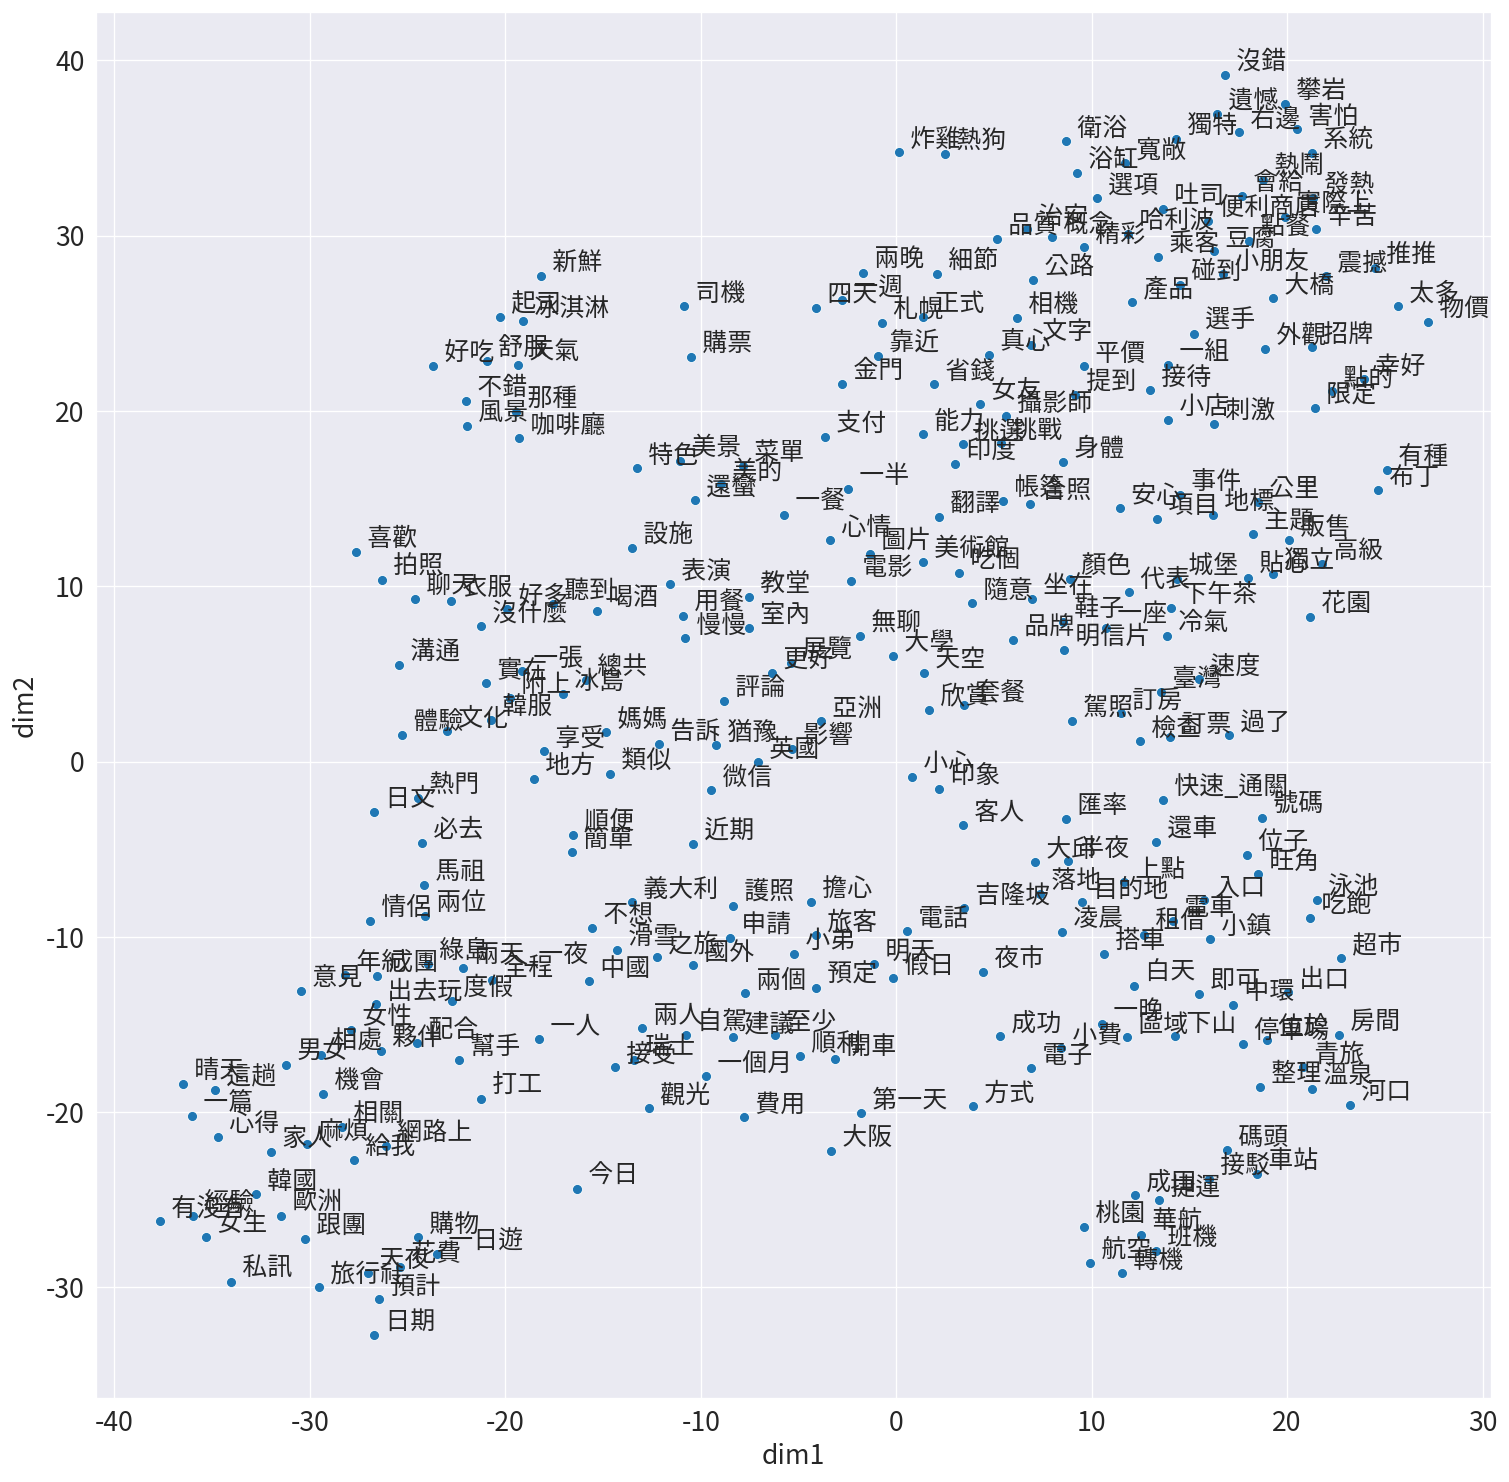

In [86]:
#ÂÖ©Á∂≠ÁöÑÊï£‰ΩàÂúñ
plotScatter(word_df)

Áî±Ê≠§ÂèØÁúãÂá∫Â≠óË©ûÈñìÁöÑÈóúËÅØÊÄßÔºåÂÉèÊòØ‰∏äÈù¢ÊèêÂèäÁöÑÂêêÂè∏ÔºåÂ∞±Ë∑ü‰æøÂà©ÂïÜÂ∫óÈÑ∞ËøëÔºåÂèØËÉΩÊÉÖÂΩ¢ÂÉèÊòØÂ≠∏Áîü‰ΩèÈùíÊóÖÊàñÊòØÁÇ∫‰∫ÜÁúÅÈå¢ÔºåËÄåÂéª‰æøÂà©ÂïÜÂ∫óË≥ºË≤∑ÂêêÂè∏Áï∂Êó©È§ê„ÄÇ
ÊàñÊòØÂÉèÂéªÈüìÂúã„ÄÅÊ≠êÊ¥≤ÔºåÂèØËÉΩÈÅ∏ÊìáË∑üÂúòÁöÑ‰∫∫Â∞±ÊúÉÊØîËºÉÂ§ö„ÄÇ

(300, 20)


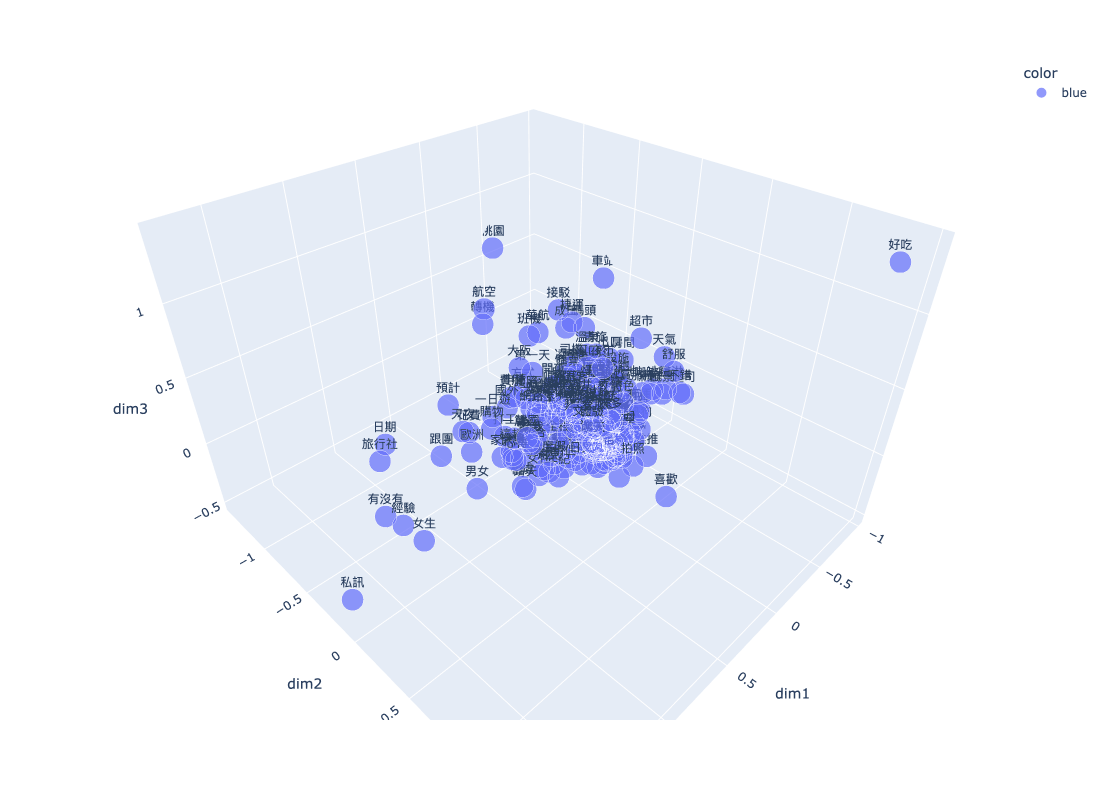

In [90]:
#‰∏âDÊï£ÁãÄÂúñ
ew_feat = reduceDim(feat,dim = 3,method = 'PCA' )
print(new_feat.shape)
new_word_df = pd.DataFrame({
    "word":sample_words,
    "dim1":new_feat[:,0],
    "dim2":new_feat[:,1],
    "dim3":new_feat[:,2],
})
plotScatter3D(new_word_df)

In [88]:
# ÂàÜÁæ§
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
# Âè™‰ΩøÁî®word vector ÂéªÂàÜÁæ§ÔºåÈÄèÈÅéÊñáÂ≠óÂêëÈáè‰æÜÈÄ≤Ë°åÂàÜÁæ§
def cluster(X,method = 'kmeans',n = 2):

    method_dict = {
        'kmeans':KMeans(n_clusters=n, random_state=0),
        'kmedos':KMedoids(n_clusters=n, random_state=0)
    }
    method_dict[method].fit(X)
    result = method_dict[method].predict(X)
    return result

/opt/anaconda3/envs/SMA2024env/lib/python3.9/site-packages/sklearn_extra/cluster/_commonnn.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/envs/SMA2024env/lib/python3.9/site-packages/sklearn_extra/cluster/_commonnn.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



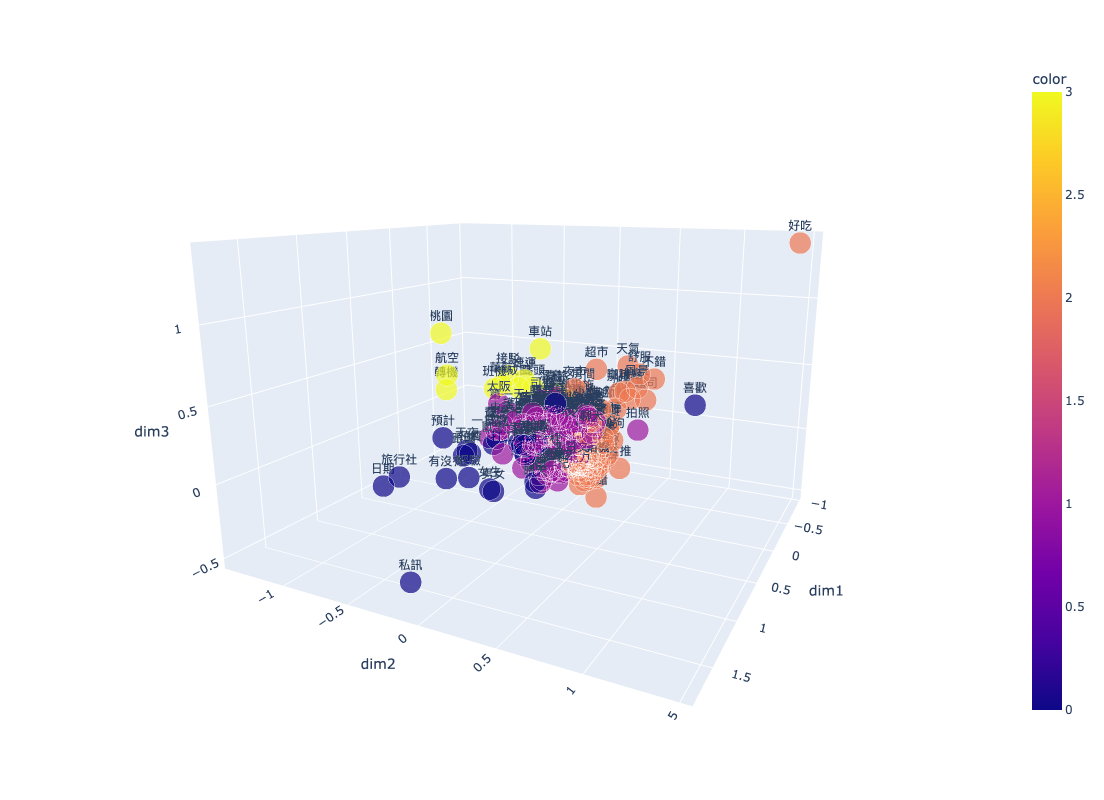

In [89]:
new_feat = reduceDim(feat,method='PCA',dim = 20)
d3_feat = reduceDim(feat,method='PCA',dim = 3)
word_df = pd.DataFrame({
    "word":sample_words,
    "color":cluster(new_feat,n=4),
    "dim1":d3_feat[:,0],
    "dim2":d3_feat[:,1],
    "dim3":d3_feat[:,2],

})
#Áπ™Ë£Ω‰∏âDÊï£ÁãÄÂúñ
plotScatter3D(word_df)

‰ª•‰∏äÈÄèÈÅé‰∏çÂêåÊñπÂºè‰æÜÂëàÁèæÈôçÁ∂≠ÂæåÁî¢ÁîüÁöÑÁµêÊûú